### 주제: 음악 장르 분류 AI 경진대회
---
출처: https://dacon.io/competitions/official/236056/overview/description

- genre : 음악 장르 (총 15개 종류)  
        Underground Rap, 
        Dark Trap, 
        trance, 
        Hiphop, 
        trap, 
        techhouse, 
        techno, 
        psytrance, 
        hardstyle, 
        dnb, 
        RnB, 
        Trap Metal, 
        Rap, 
        Emo, 
        Pop

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import all_estimators
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

1. 데이터 로딩 및 준비

In [2]:
train = pd.read_csv('train.csv').iloc[:,1:]
test = pd.read_csv('test.csv').iloc[:,1:]

In [3]:
train

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,genre
0,0.3341,0.9231,10,0.8540,0.3797,0.0080,0.0002,0.7697,0.7902,0.5391,175,trap
1,0.6344,0.5955,10,0.2826,0.1378,0.0000,0.7137,0.1597,0.4162,0.3043,513,techno
2,0.3983,0.1107,8,0.2459,0.0247,0.7740,0.0000,0.5105,0.4291,0.2324,151,Trap Metal
3,0.3139,0.9702,2,0.9252,0.9590,0.0371,0.3015,0.2539,0.0577,0.5406,246,trap
4,0.0735,0.9452,5,0.7702,0.1397,0.2583,0.0015,0.1774,0.1128,0.3176,229,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...
25378,0.8814,0.3398,6,0.4602,0.3825,0.4505,0.0000,0.4222,0.8753,0.4081,88,Underground Rap
25379,0.7505,0.5657,0,0.6682,0.1038,0.1281,0.0000,0.0596,0.9583,0.4273,123,Trap Metal
25380,0.2520,0.7617,8,0.4928,0.0410,0.0003,0.8395,0.0843,0.1372,0.7828,353,dnb
25381,0.6202,0.3455,0,0.6499,0.7960,0.4818,0.0000,0.2007,0.0194,0.9756,120,Dark Trap


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25383 entries, 0 to 25382
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      25383 non-null  float64
 1   energy            25383 non-null  float64
 2   key               25383 non-null  int64  
 3   loudness          25383 non-null  float64
 4   speechiness       25383 non-null  float64
 5   acousticness      25383 non-null  float64
 6   instrumentalness  25383 non-null  float64
 7   liveness          25383 non-null  float64
 8   valence           25383 non-null  float64
 9   tempo             25383 non-null  float64
 10  duration          25383 non-null  int64  
 11  genre             25383 non-null  object 
dtypes: float64(9), int64(2), object(1)
memory usage: 2.3+ MB


In [5]:
# 중복 데이터 체크
train.duplicated().sum()

1687

In [6]:
# 중복 데이터 삭제
train = train.drop_duplicates()

In [7]:
train

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,genre
0,0.3341,0.9231,10,0.8540,0.3797,0.0080,0.0002,0.7697,0.7902,0.5391,175,trap
1,0.6344,0.5955,10,0.2826,0.1378,0.0000,0.7137,0.1597,0.4162,0.3043,513,techno
2,0.3983,0.1107,8,0.2459,0.0247,0.7740,0.0000,0.5105,0.4291,0.2324,151,Trap Metal
3,0.3139,0.9702,2,0.9252,0.9590,0.0371,0.3015,0.2539,0.0577,0.5406,246,trap
4,0.0735,0.9452,5,0.7702,0.1397,0.2583,0.0015,0.1774,0.1128,0.3176,229,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...
25378,0.8814,0.3398,6,0.4602,0.3825,0.4505,0.0000,0.4222,0.8753,0.4081,88,Underground Rap
25379,0.7505,0.5657,0,0.6682,0.1038,0.1281,0.0000,0.0596,0.9583,0.4273,123,Trap Metal
25380,0.2520,0.7617,8,0.4928,0.0410,0.0003,0.8395,0.0843,0.1372,0.7828,353,dnb
25381,0.6202,0.3455,0,0.6499,0.7960,0.4818,0.0000,0.2007,0.0194,0.9756,120,Dark Trap


In [8]:
# 결측치 확인
train.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration            0
genre               0
dtype: int64

In [9]:
# 학습 데이터 타겟(장르) 분리
data = train.iloc[:,:-1]
target = train.iloc[:,-1]

In [10]:
genre = pd.DataFrame(target.value_counts())

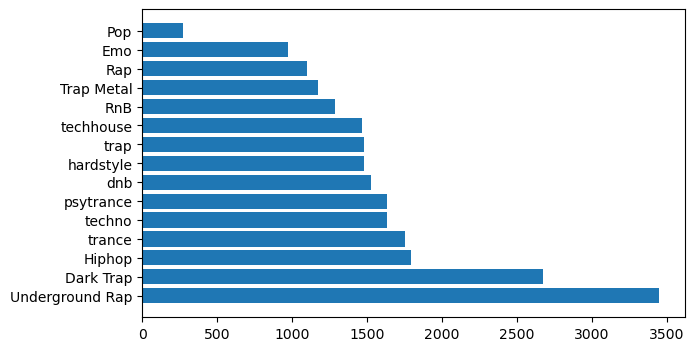

In [11]:
# 타겟 분포 확인
plt.figure(figsize=(7, 4))
plt.barh(genre.index, genre['genre'])
plt.show()

-> 클래스 불균형 (나중 해결)

In [16]:
from imblearn.under_sampling import RandomUnderSampler

In [32]:
X_samp, y_samp = RandomUnderSampler(random_state=0).fit_resample(data, target)
df_samp = pd.concat([X_samp, y_samp], axis=1)

In [33]:
X=df_samp[train.columns[:-1]]
y=df_samp['genre']
y.value_counts()

Dark Trap          269
Emo                269
Hiphop             269
Pop                269
Rap                269
RnB                269
Trap Metal         269
Underground Rap    269
dnb                269
hardstyle          269
psytrance          269
techhouse          269
techno             269
trance             269
trap               269
Name: genre, dtype: int64

-> 언더 샘플링: 더 낮은 정확도

2. 학습/검증 데이터 분리

In [34]:
train_X, val_X, train_y, val_y = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=42)

In [35]:
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((3228, 11), (807, 11), (3228,), (807,))

3. 최적의 모델 찾기

In [24]:
models = all_estimators(type_filter='classifier')
scores = []
names = []

for name, model in models:
    try:
        # 모델 객체 생성
        md = model()
        # 학습
        md.fit(train_X, train_y)
        # 평가
        result1 = md.score(train_X, train_y)
        result2 = md.score(val_X, val_y)
        names.append(name)
        scores.append((name, np.round(result1,3), np.round(result2,3)))
    except:
        pass

C:\Users\gram\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gram\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gram\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gram\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gram\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\gram\AppData\Roaming\Python\Python39\site-pack

In [26]:
scoresDf = pd.DataFrame(scores, columns=['model', 'train_score', 'test_score'])
scoresDf.sort_values(by='test_score', ascending=False).head(15)

,model,train_score,test_score
13,HistGradientBoostingClassifier,0.995,0.591
12,GradientBoostingClassifier,0.907,0.579
28,RandomForestClassifier,0.995,0.577
9,ExtraTreesClassifier,0.995,0.564
1,BaggingClassifier,0.984,0.548
27,QuadraticDiscriminantAnalysis,0.577,0.527
21,MLPClassifier,0.573,0.512
20,LogisticRegressionCV,0.522,0.502
10,GaussianNB,0.523,0.501
19,LogisticRegression,0.508,0.480


4. 모델 학습 - GBM/랜덤포레스트

In [36]:
model = GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 500)
#model = RandomForestClassifier()
model.fit(train_X, train_y)

GradientBoostingClassifier(n_estimators=500)

5. 모델 평가

In [38]:
pred = model.predict(val_X)
accuracy_score(val_y, pred)

0.6047087980173482

6. 모델 예측

In [39]:
predict = model.predict(test)

In [40]:
sub = pd.read_csv('sample_submission.csv')
sub.head()

,ID,genre
0,TEST_00000,Pop
1,TEST_00001,Pop
2,TEST_00002,Pop
3,TEST_00003,Pop
4,TEST_00004,Pop


In [41]:
sub['genre'] = predict

In [42]:
sub

,ID,genre
0,TEST_00000,Hiphop
1,TEST_00001,Trap Metal
2,TEST_00002,Emo
3,TEST_00003,techhouse
4,TEST_00004,Pop
...,...,...
16917,TEST_16917,techhouse
16918,TEST_16918,Hiphop
16919,TEST_16919,hardstyle
16920,TEST_16920,psytrance


In [43]:
sub.to_csv('result.csv', index=False)

In [44]:
# 확인
pd.read_csv('result.csv')

,ID,genre
0,TEST_00000,Hiphop
1,TEST_00001,Trap Metal
2,TEST_00002,Emo
3,TEST_00003,techhouse
4,TEST_00004,Pop
...,...,...
16917,TEST_16917,techhouse
16918,TEST_16918,Hiphop
16919,TEST_16919,hardstyle
16920,TEST_16920,psytrance
